# Import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
import json

---
# Import and cleaning datas:

In [3]:
#photovoltaic_datas = pd.read_csv("photovoltaic_monitoring_data.csv")
#photovoltaic_datas = pd.read_csv("photovoltaic_gpt.csv")
photovoltaic_datas = pd.read_csv("photovoltaic_gpt_hist_id.csv")
#photovoltaic_datas = pd.read_json("photovoltaic_gpt.json")



In [4]:
# import numpy as np
# num_panels = 200
# num_days = len(photovoltaic_datas) // num_panels
# photovoltaic_datas["id"] = np.tile(np.arange(num_panels), num_days)
# ids =  photovoltaic_datas.pop("id")
# photovoltaic_datas.insert(0, 'id', ids)
photovoltaic_datas.to_csv("photovoltaic_gpt_hist_id.csv")
#photovoltaic_datas = photovoltaic_datas.drop(columns=['Unnamed'])
photovoltaic_datas = photovoltaic_datas.sort_values('id')

## Columns:

In [5]:
photovoltaic_datas.head()

,Unnamed: 0,id,etat_panneau,irradiance,temp_amb,temp_module,wind_speed,wind_dir,humidity,rain,...,stops,aux_power,prod_jour,prod_mois,prod_an,disponibility,p50,p90,revenus,day
0,0,0,sain,837.74,22.57,31.15,2.25,114.0,50.2,0.0,...,2,45.81,769.5800,23087.400,277048.800,0.99,824.72,766.19,76.95800,1
2400,2400,0,sain,837.74,22.57,31.15,2.25,114.0,50.2,0.0,...,2,45.81,769.5800,23087.400,277048.800,0.99,824.72,766.19,76.95800,13
2200,2200,0,sain,837.74,22.57,31.15,2.25,114.0,50.2,0.0,...,2,45.81,769.5800,23087.400,277048.800,0.99,824.72,766.19,76.95800,12
200,200,0,sain,837.74,22.57,31.15,2.25,114.0,50.2,0.0,...,2,45.81,708.0136,21240.408,254884.896,0.99,824.72,766.19,70.80136,2
1200,1200,0,sain,837.74,22.57,31.15,2.25,114.0,50.2,0.0,...,4,45.81,769.5800,23087.400,277048.800,0.99,824.72,766.19,76.95800,7


## Columns type

In [6]:
photovoltaic_datas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2800 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2800 non-null   int64  
 1   id              2800 non-null   int64  
 2   etat_panneau    2800 non-null   object 
 3   irradiance      2800 non-null   float64
 4   temp_amb        2800 non-null   float64
 5   temp_module     2800 non-null   float64
 6   wind_speed      2800 non-null   float64
 7   wind_dir        2800 non-null   float64
 8   humidity        2800 non-null   float64
 9   rain            2800 non-null   float64
 10  dc_power        2800 non-null   float64
 11  voltage         2800 non-null   float64
 12  current         2800 non-null   float64
 13  ac_power        2800 non-null   float64
 14  PR              2800 non-null   float64
 15  eff_module      2800 non-null   float64
 16  eff_global      2800 non-null   float64
 17  onduleur_state  2800 non-null   object

## Data description (count, max, min, mean...)

In [7]:
photovoltaic_datas.describe()


,Unnamed: 0,id,irradiance,temp_amb,temp_module,wind_speed,wind_dir,humidity,rain,dc_power,...,stops,aux_power,prod_jour,prod_mois,prod_an,disponibility,p50,p90,revenus,day
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.00000,2800.000000,2800.00000,2800.000000,...,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.00000,2800.000000,2800.000000
mean,1399.500000,99.500000,788.351650,24.976800,39.831400,2.984050,177.45950,55.863000,0.30000,131.242824,...,2.433214,50.090650,596.757726,17902.731786,214832.781437,0.914150,637.949850,579.04365,59.675773,7.500000
std,808.434702,57.744618,156.306581,5.100069,7.291699,1.455329,101.01463,19.869246,0.64819,51.266002,...,3.927692,9.817988,273.206517,8196.195520,98354.346240,0.103277,289.046241,264.01404,27.320652,4.031849
min,0.000000,0.000000,270.140000,12.330000,20.190000,0.000000,1.60000,20.500000,0.00000,10.088000,...,0.000000,23.040000,0.452400,13.572000,162.864000,0.600000,0.620000,0.55000,0.045240,1.000000
25%,699.750000,49.750000,691.322500,21.120000,34.662500,1.825000,98.47500,41.250000,0.00000,108.150000,...,0.000000,43.505000,503.580000,15107.400000,181288.800000,0.900000,543.370000,488.99250,50.358000,4.000000
50%,1399.500000,99.500000,791.960000,25.440000,40.005000,2.930000,173.95000,55.000000,0.00000,140.290000,...,1.000000,50.495000,658.680000,19760.400000,237124.800000,0.960000,715.810000,637.94000,65.868000,7.500000
75%,2099.250000,149.250000,907.585000,28.637500,44.207500,4.087500,266.60000,73.250000,0.50000,163.370000,...,2.000000,56.722500,763.640000,22909.200000,274910.400000,0.980000,810.747500,732.31500,76.364000,11.000000
max,2799.000000,199.000000,1191.350000,42.640000,64.400000,6.480000,359.80000,89.900000,5.00000,237.210000,...,20.000000,76.000000,1106.750000,33202.500000,398430.000000,1.000000,1164.380000,1099.32000,110.675000,14.000000


## Unique and null

In [8]:
print(photovoltaic_datas.nunique(), "\n")
print(photovoltaic_datas.isnull().sum())


Unnamed: 0        2800
id                 200
etat_panneau         3
irradiance         199
temp_amb           193
temp_module        189
wind_speed         165
wind_dir           196
humidity           176
rain                 5
dc_power           566
voltage            617
current            456
ac_power           622
PR                 244
eff_module          77
eff_global         528
onduleur_state       2
alarms               2
stops               19
aux_power          189
prod_jour          568
prod_mois          568
prod_an            568
disponibility       32
p50                200
p90                200
revenus            568
day                 14
dtype: int64 

Unnamed: 0        0
id                0
etat_panneau      0
irradiance        0
temp_amb          0
temp_module       0
wind_speed        0
wind_dir          0
humidity          0
rain              0
dc_power          0
voltage           0
current           0
ac_power          0
PR                0
eff_module        

# Histogram per variables


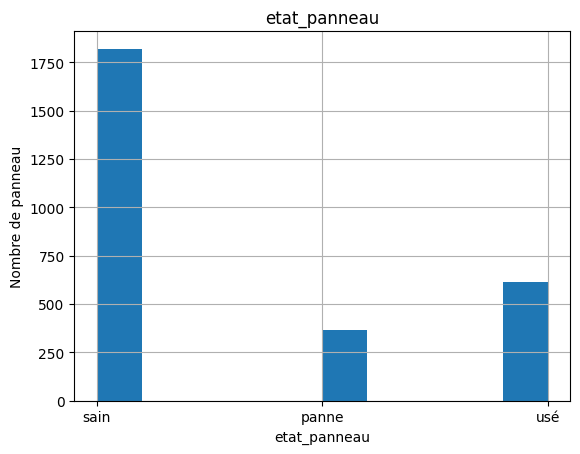

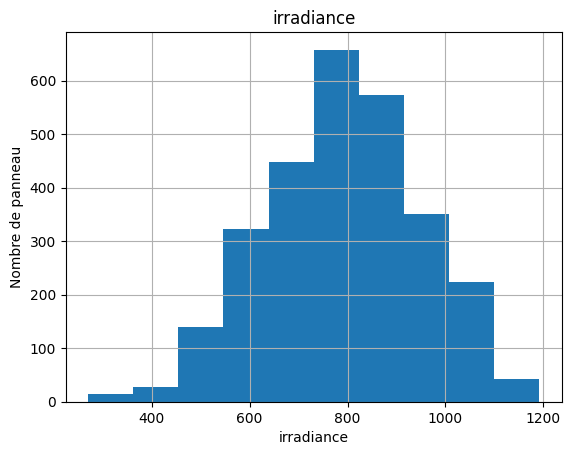

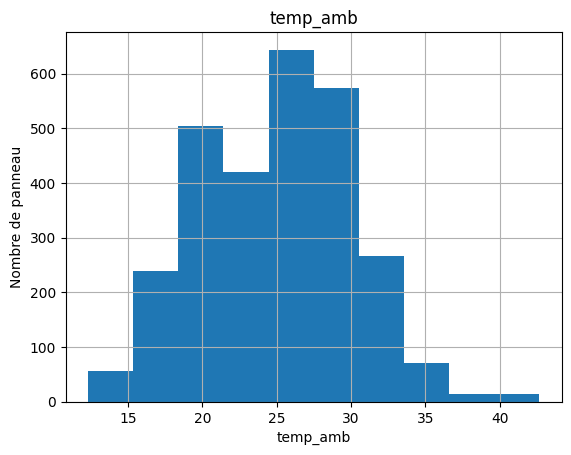

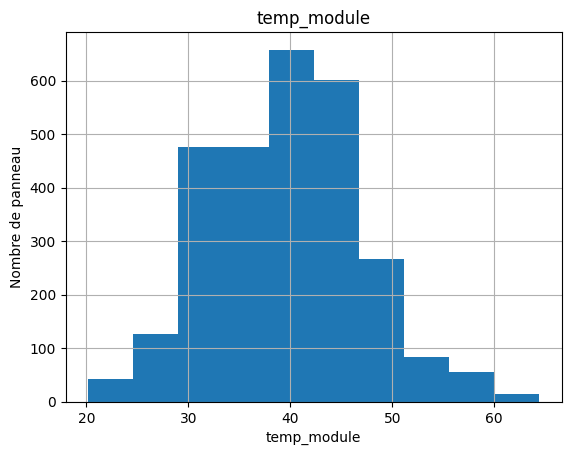

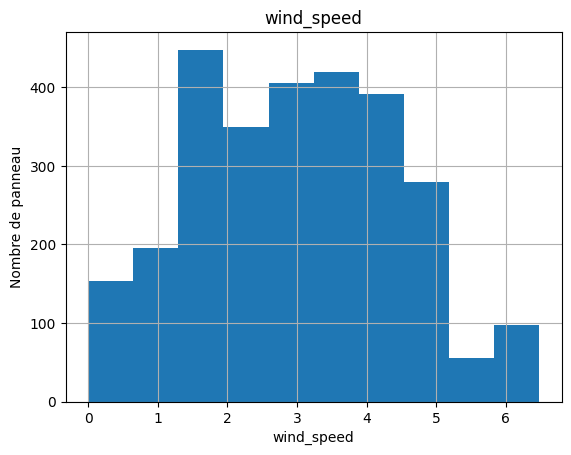

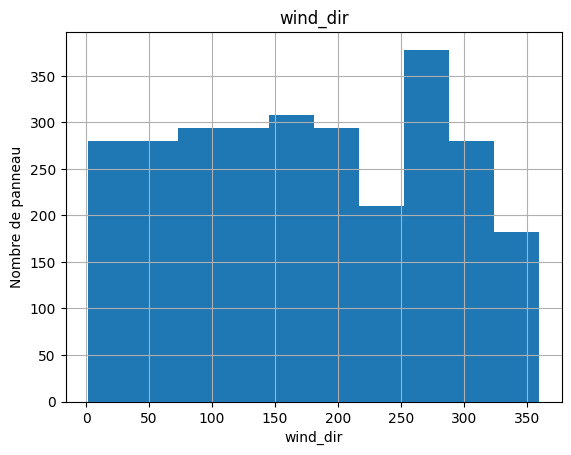

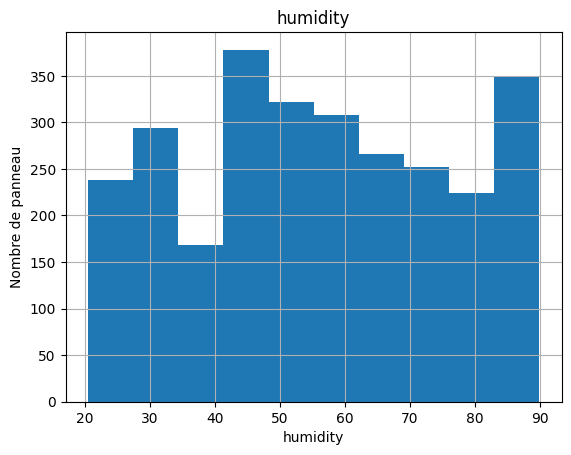

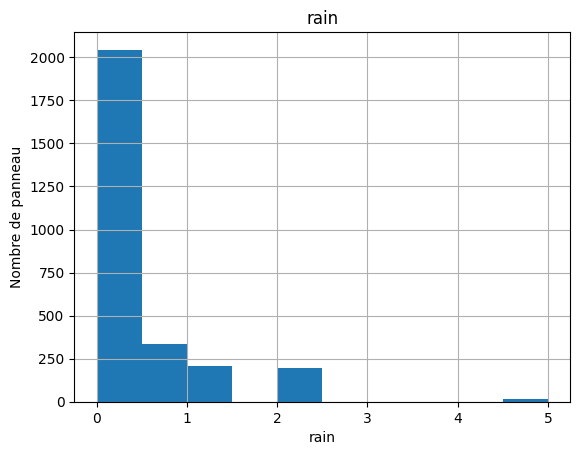

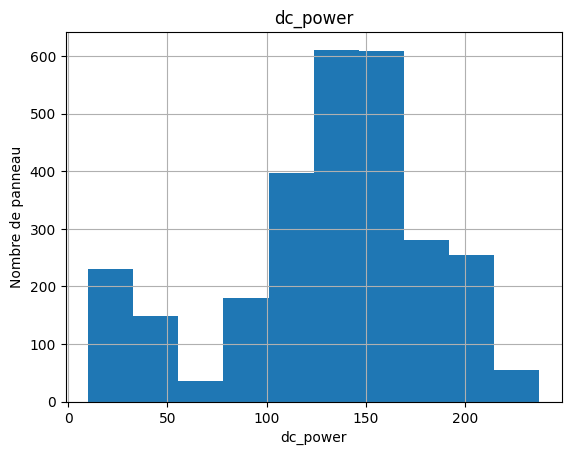

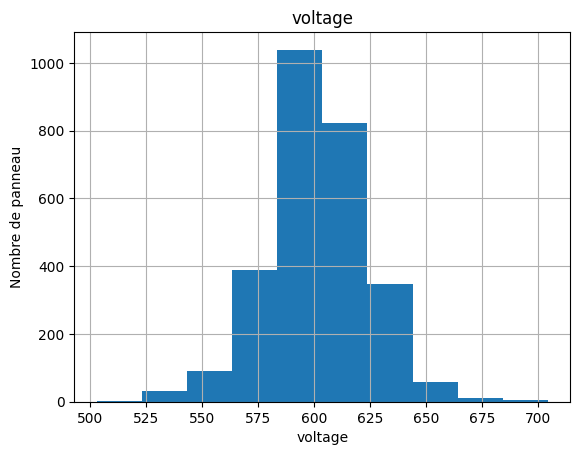

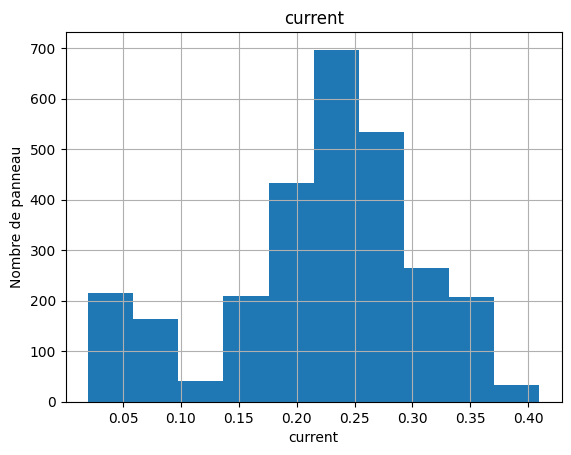

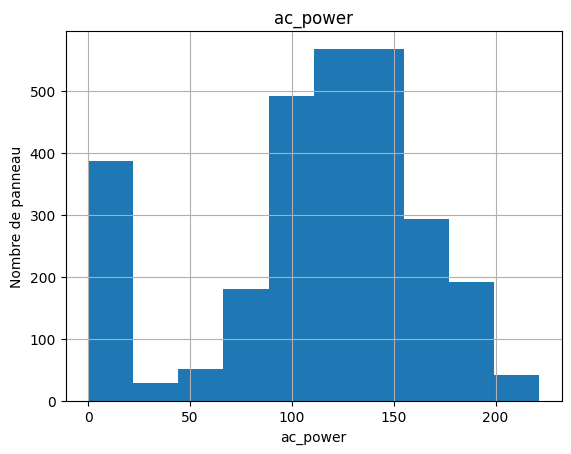

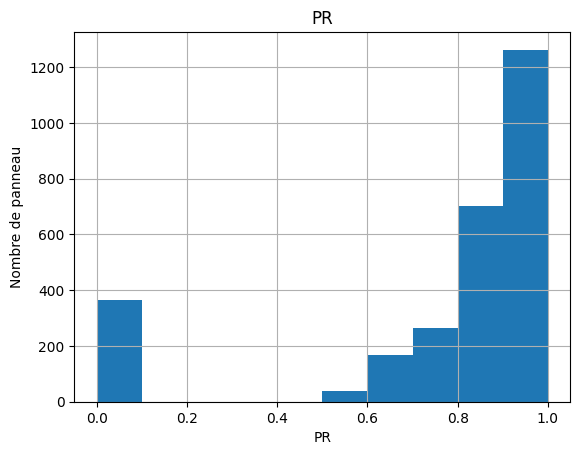

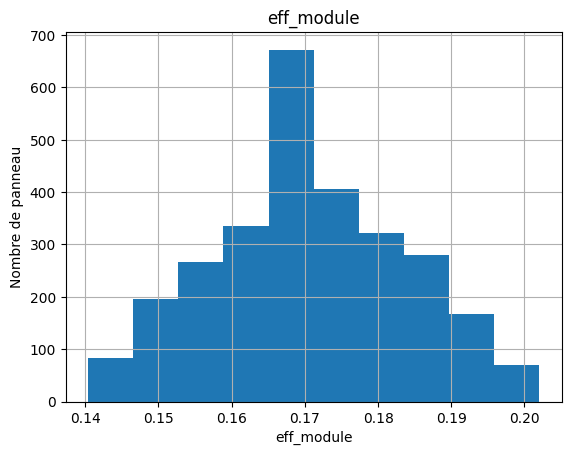

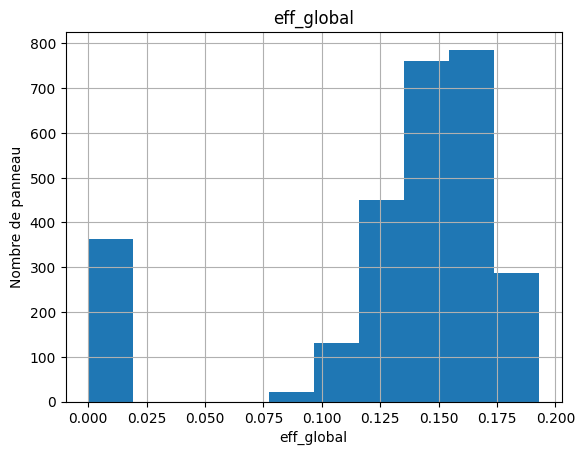

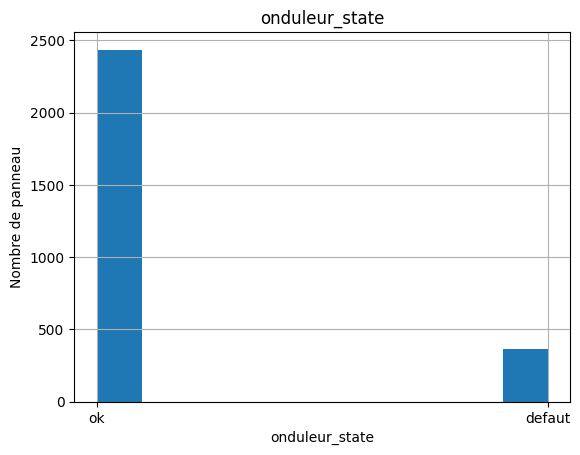

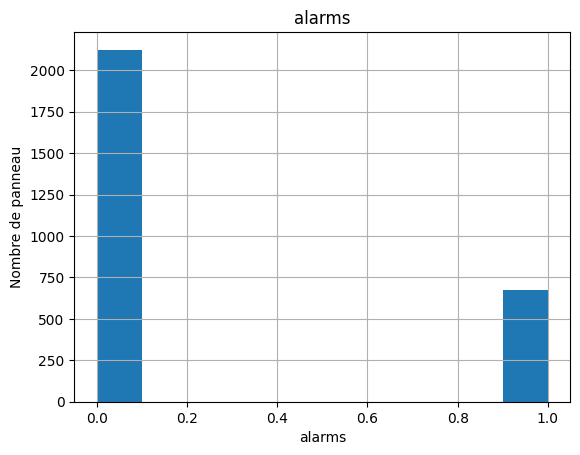

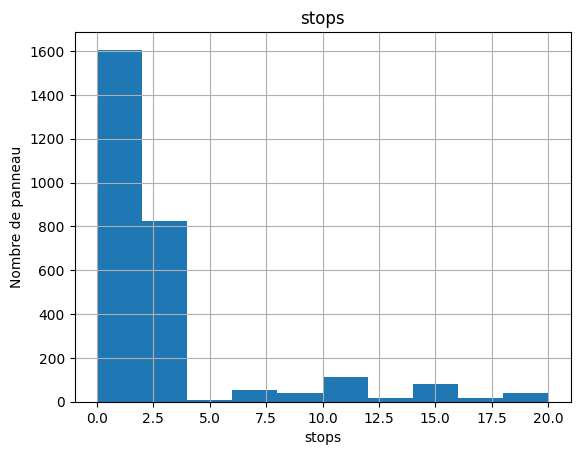

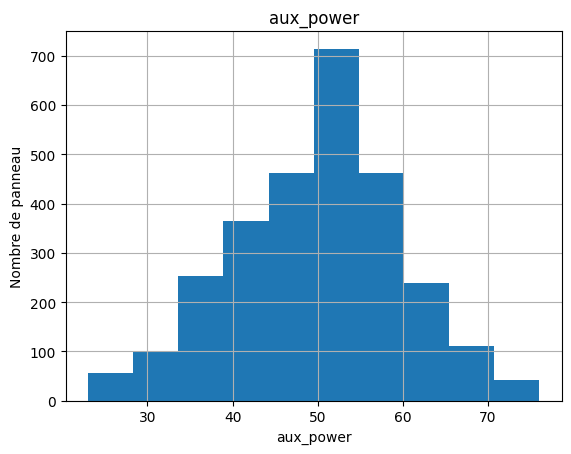

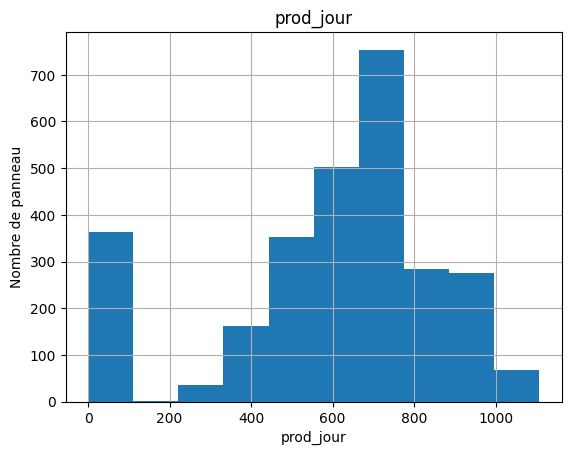

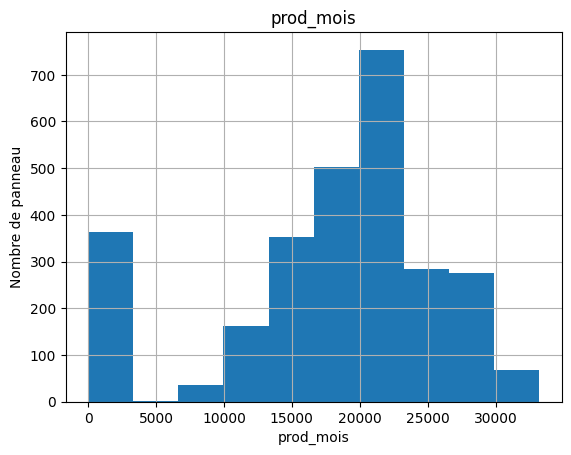

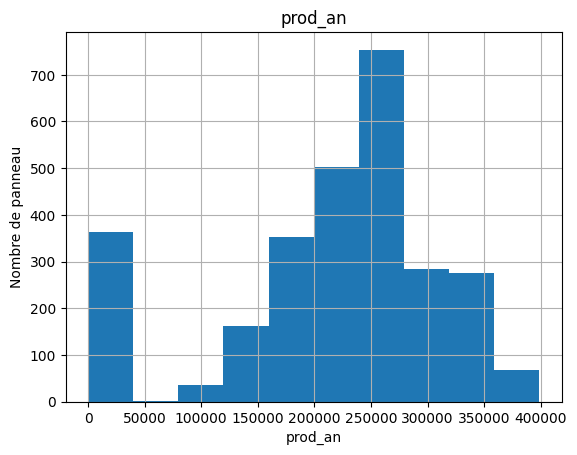

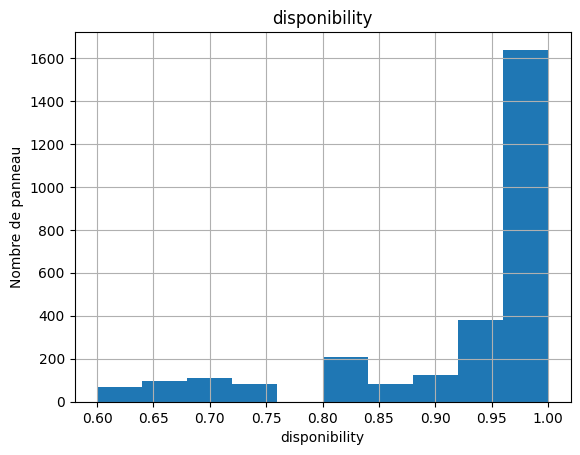

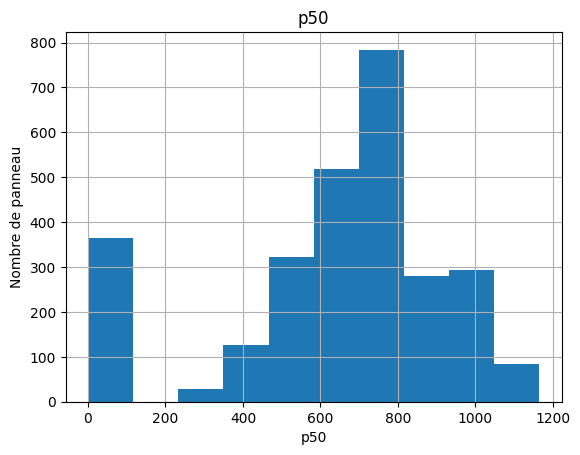

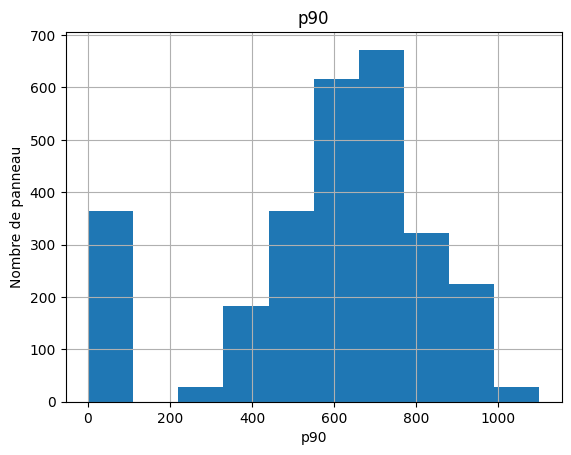

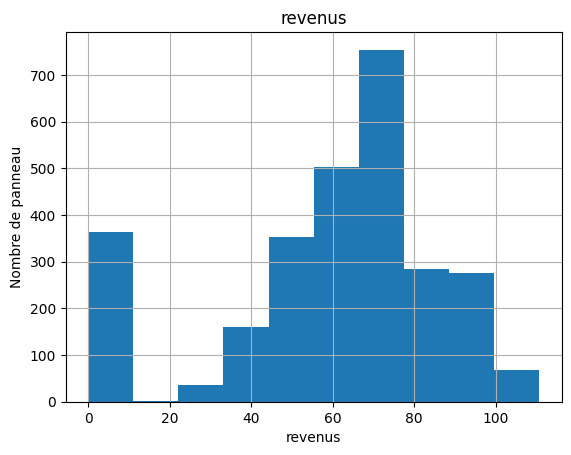

In [9]:

# photovoltaic_datas["etat_panneau"].hist()
# plt.title("etat_panneau")
# plt.xlabel("etat_panneau")
# plt.ylabel("Nombre de panneau")
columns = [
    "etat_panneau", "irradiance", "temp_amb", "temp_module", "wind_speed", "wind_dir",
    "humidity", "rain", "dc_power", "voltage", "current", "ac_power", "PR",
    "eff_module", "eff_global", "onduleur_state", "alarms", "stops", "aux_power", "prod_jour", "prod_mois",
    "prod_an", "disponibility", "p50", "p90", "revenus"
]

# columns = [
#     "irradiance", "temp_amb", "temp_module", "wind_speed", "wind_dir",
#     "humidity", "rain", "dc_power", "voltage", "current", "ac_power", "PR",
#     "eff_module", "eff_global", "onduleur_state", "alarms", "stops", "aux_power", "prod_jour", "prod_mois",
#     "prod_an", "disponibility", "p50", "p90", "revenus"
# ]

for col in columns:
    photovoltaic_datas[col].hist()
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Nombre de panneau")
    plt.show()


# Analyse des variables séparés

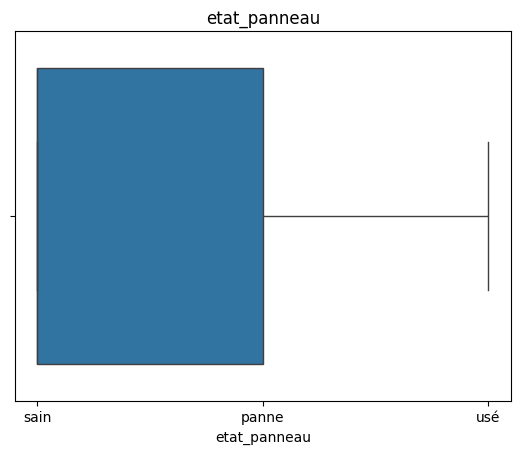

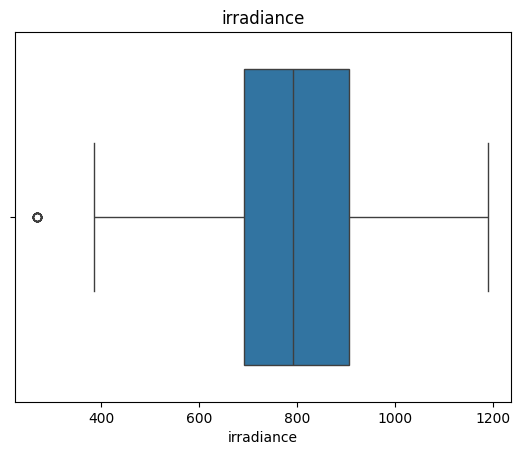

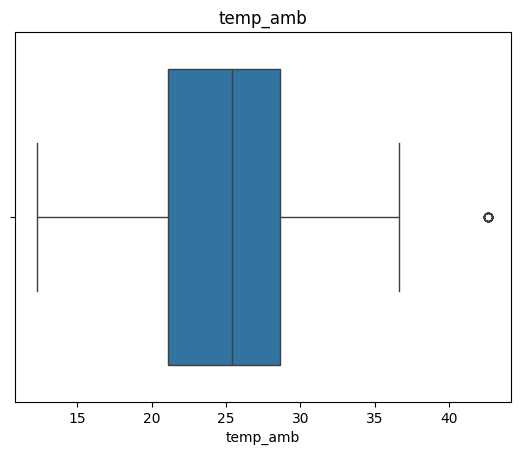

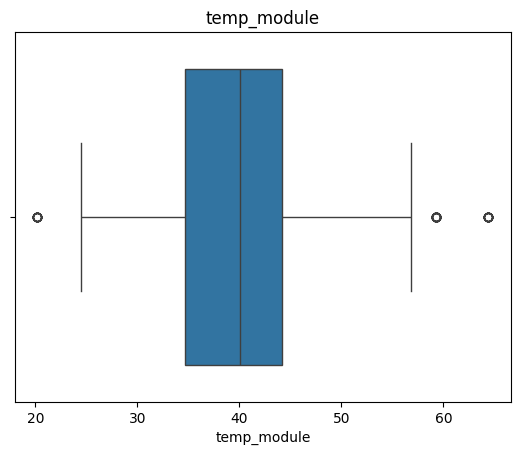

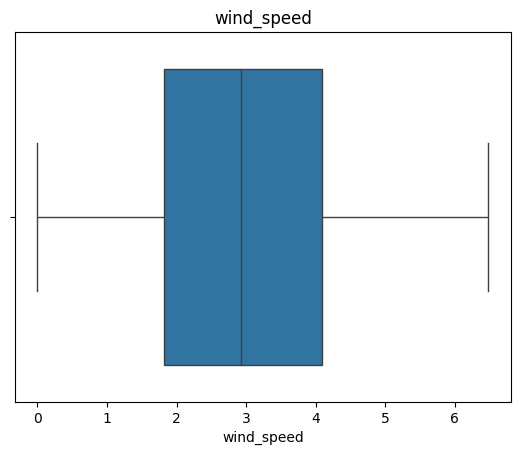

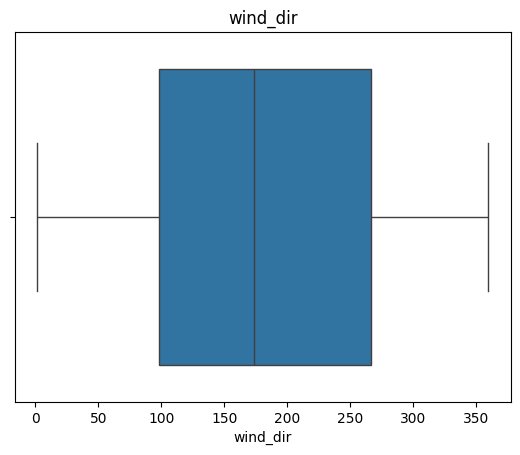

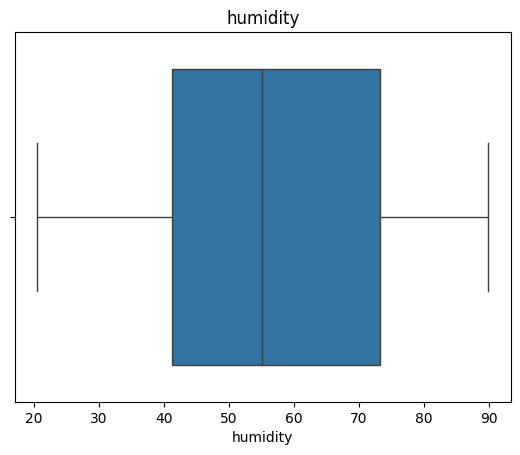

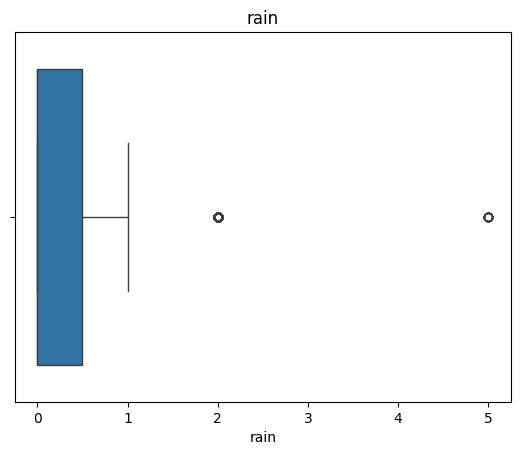

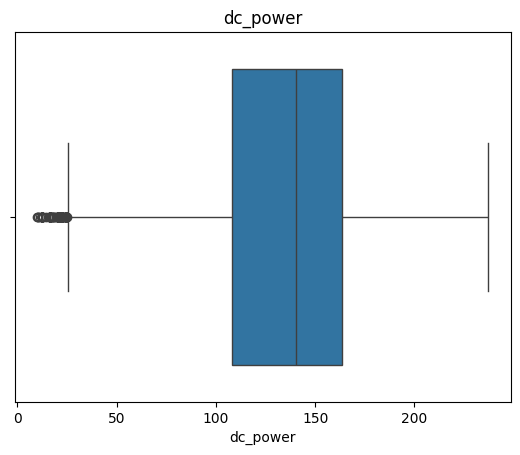

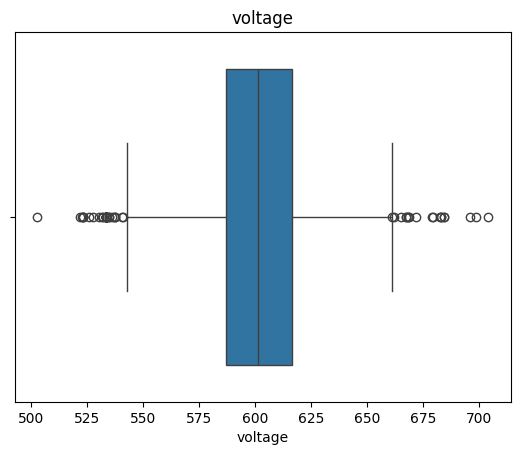

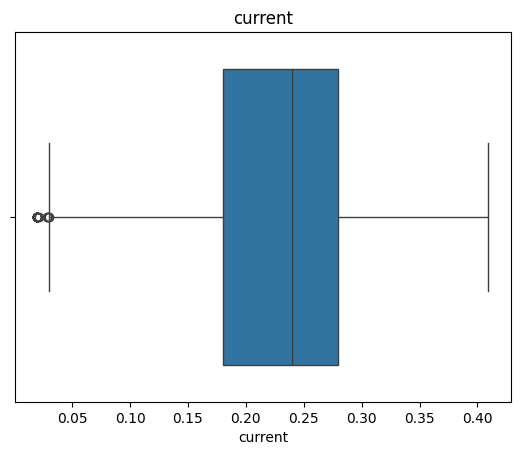

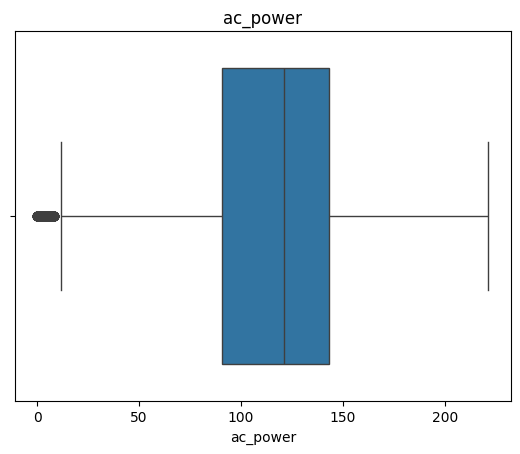

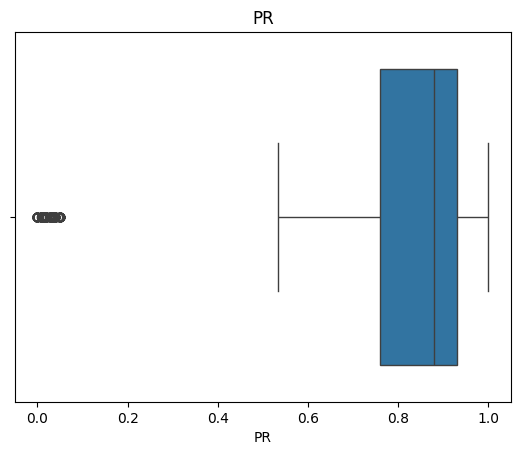

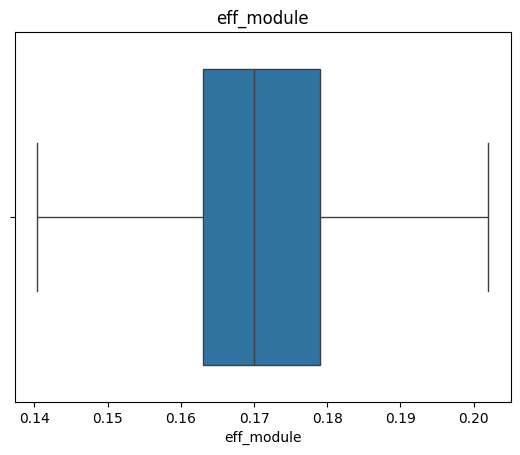

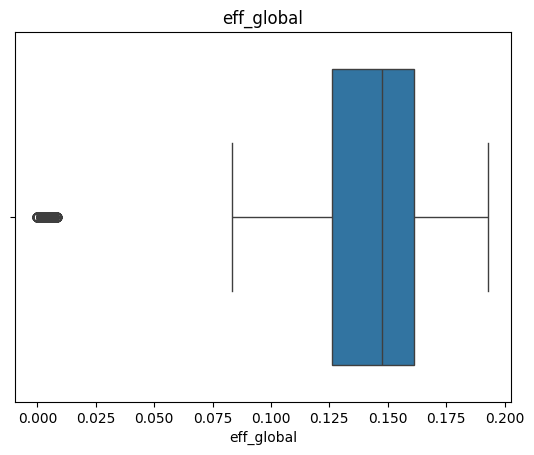

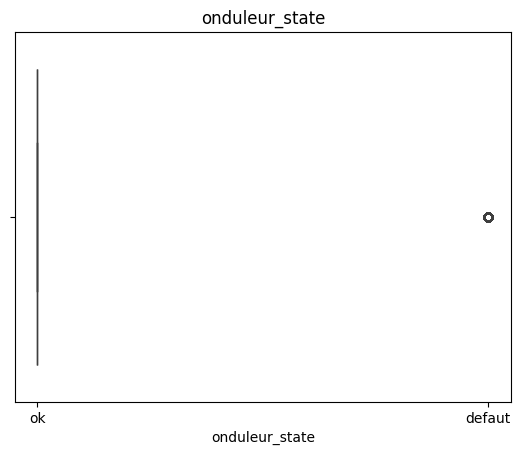

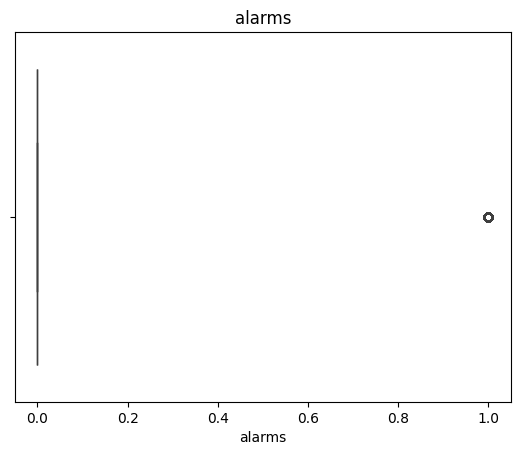

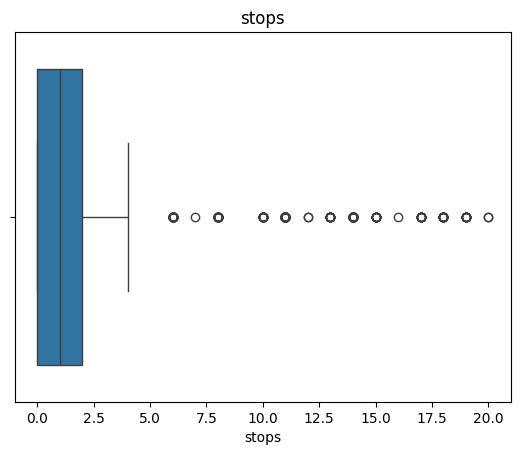

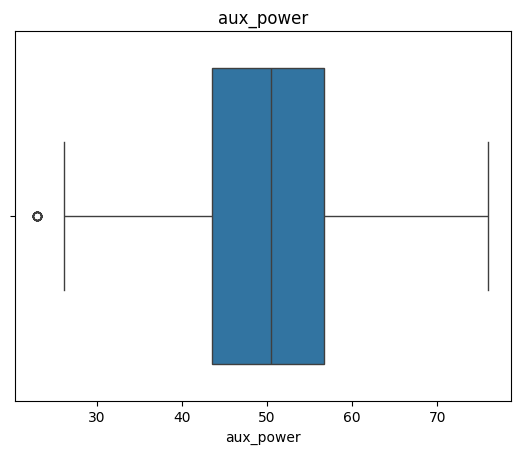

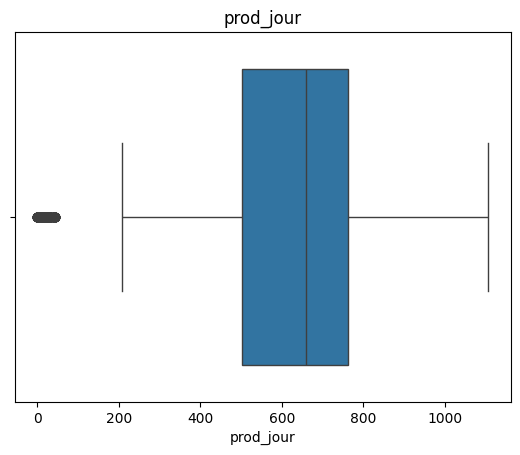

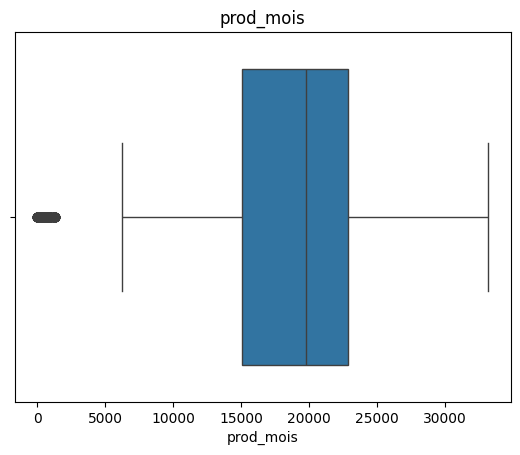

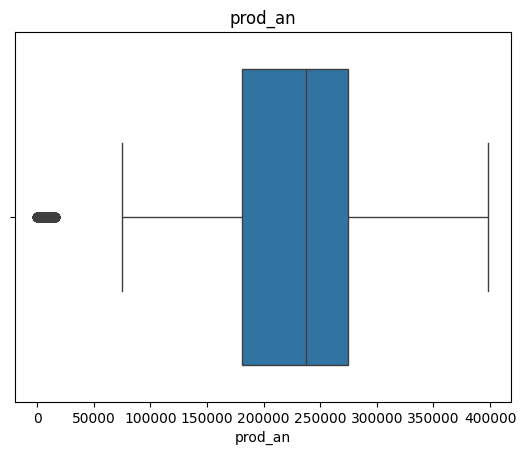

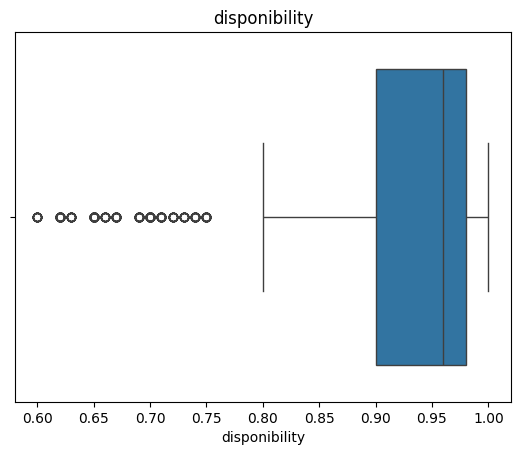

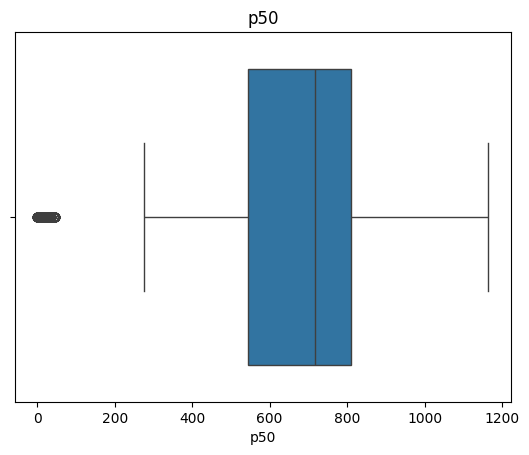

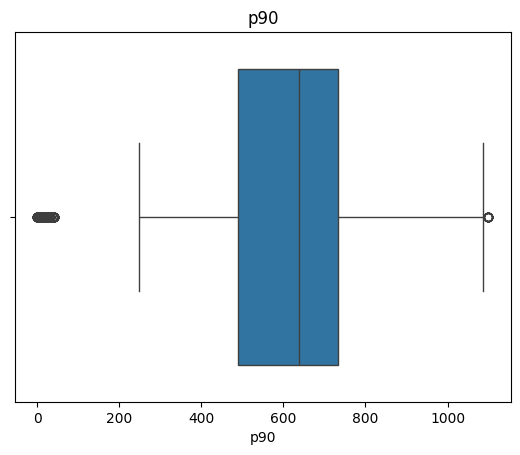

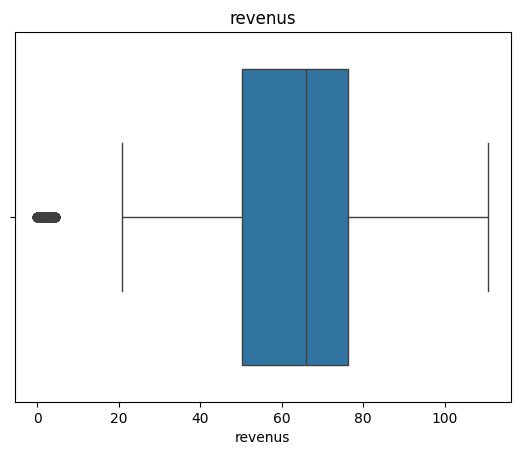

In [10]:
for col in columns:
    sns.boxplot(x=photovoltaic_datas[col])
    plt.title(col)
    plt.show()

# Visualisation des liaisons entre les variables

In [ ]:
# sns.pairplot(data=photovoltaic_datas, hue='etat_panneau', diag_kind='hist')
# plt.suptitle("Pairplot des variables numériques")
# plt.show()

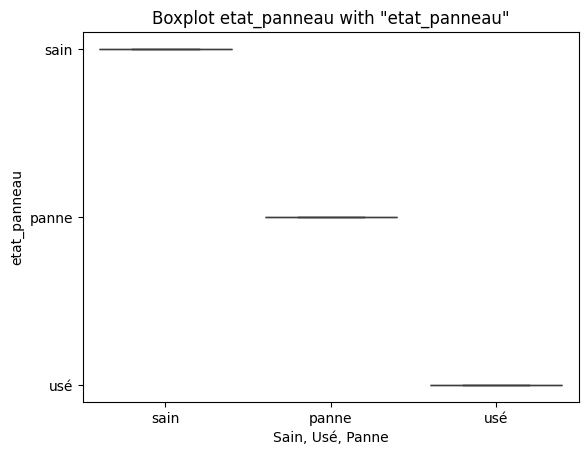

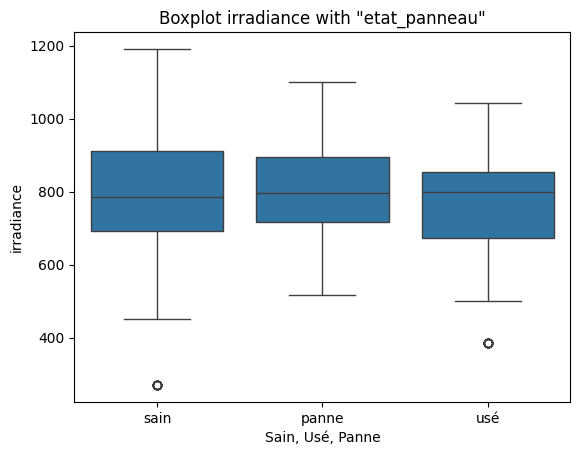

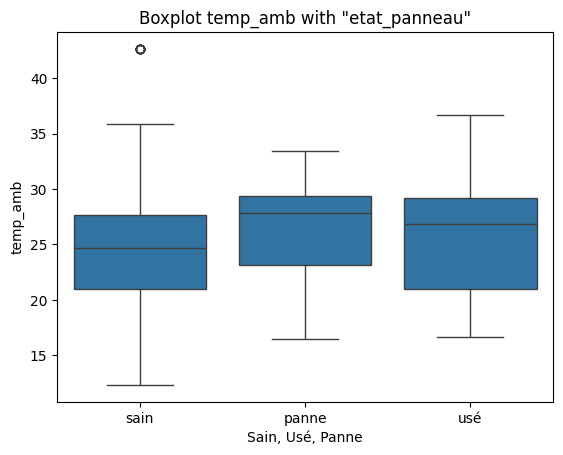

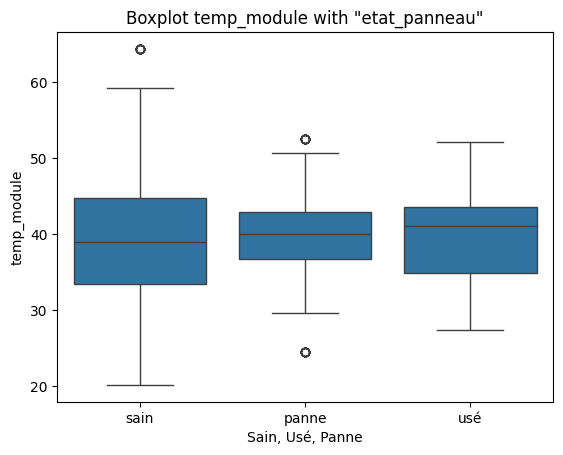

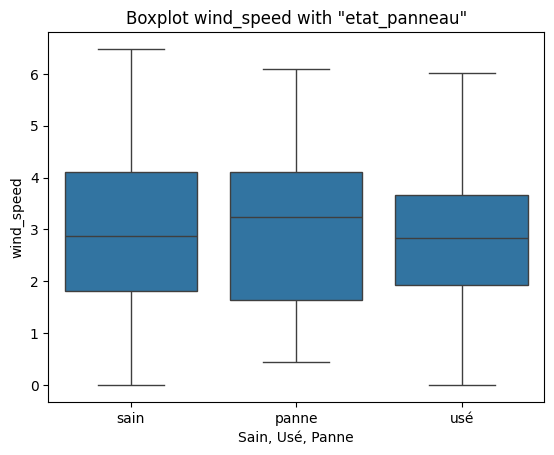

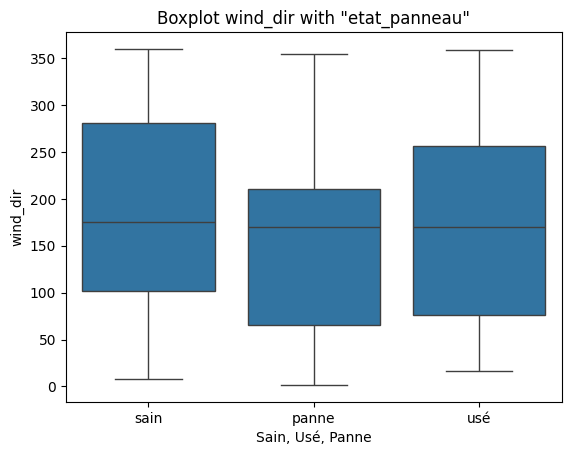

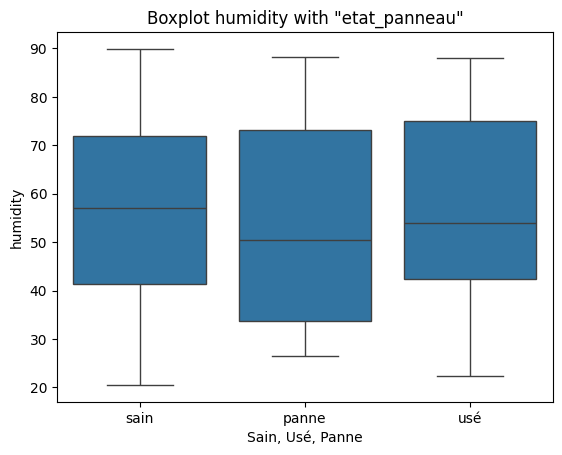

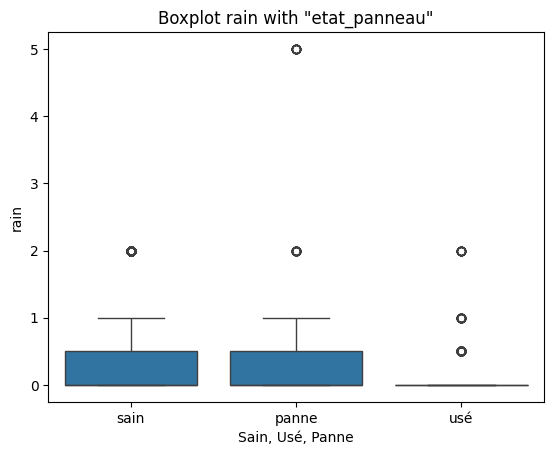

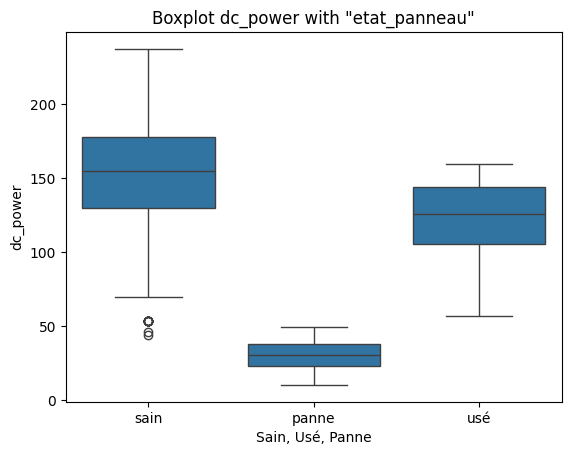

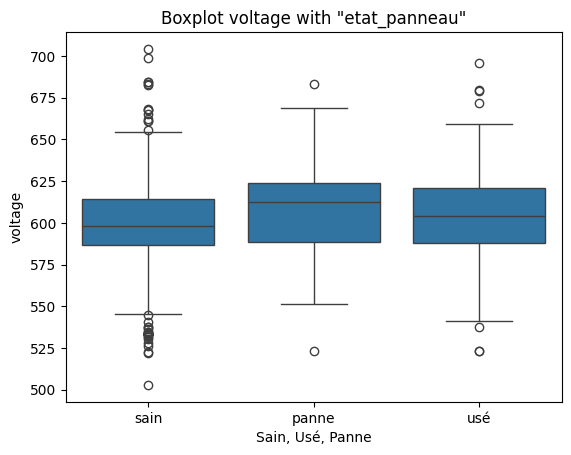

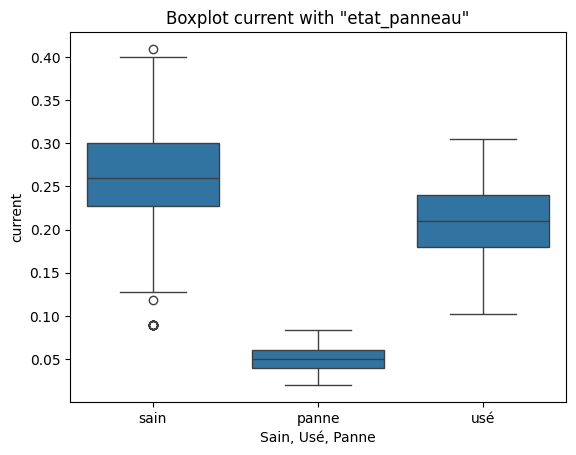

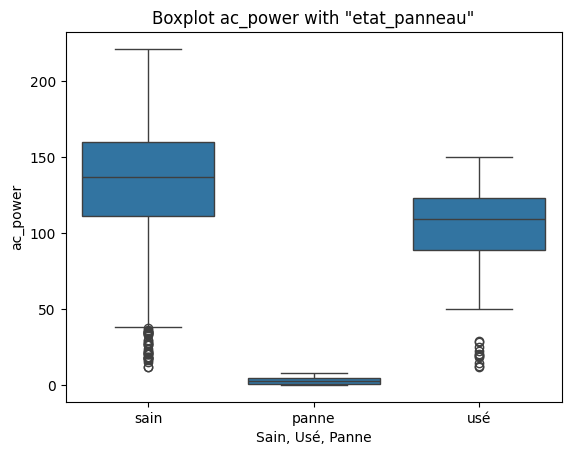

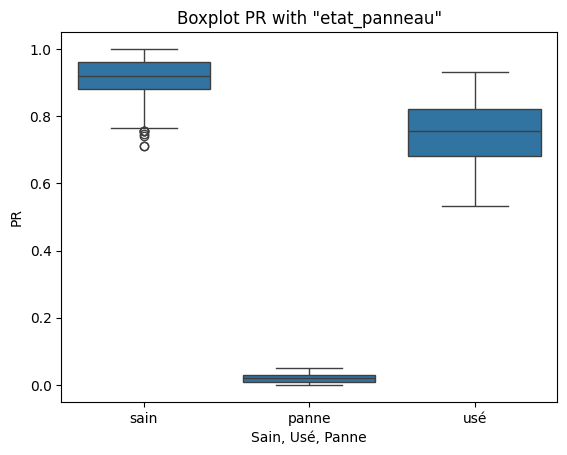

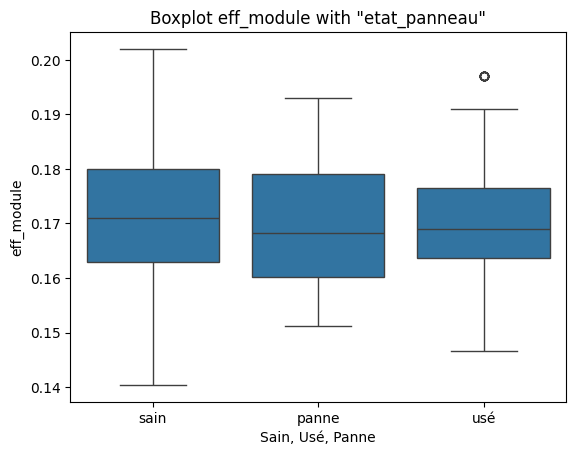

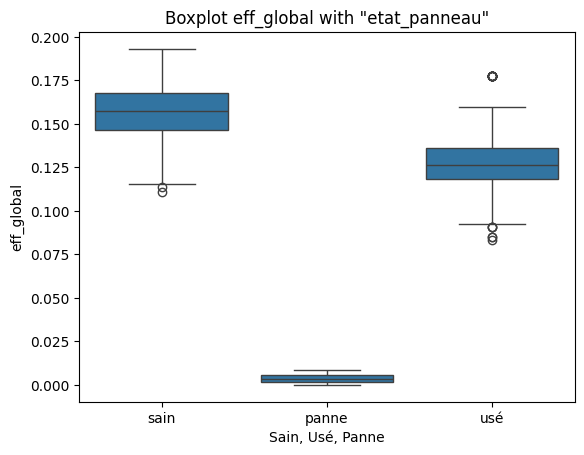

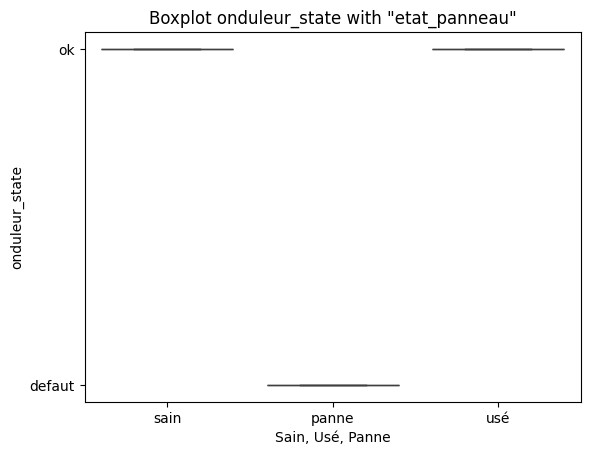

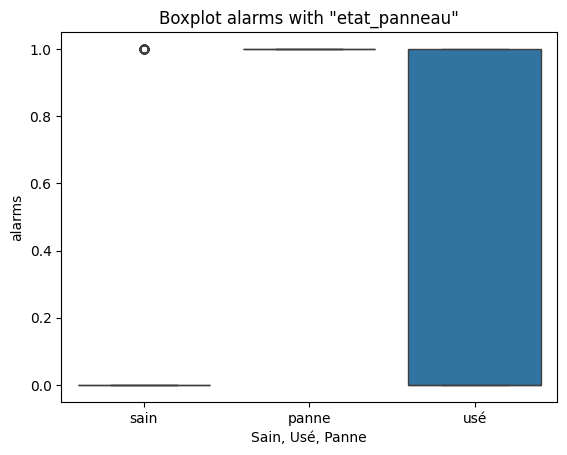

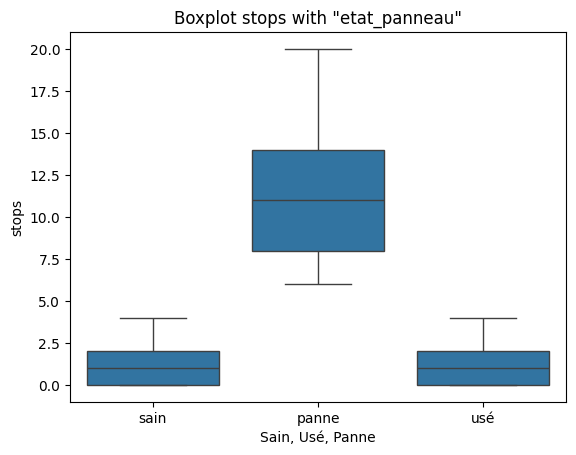

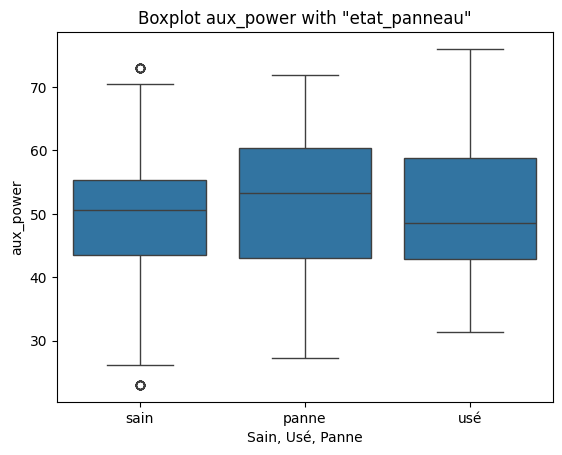

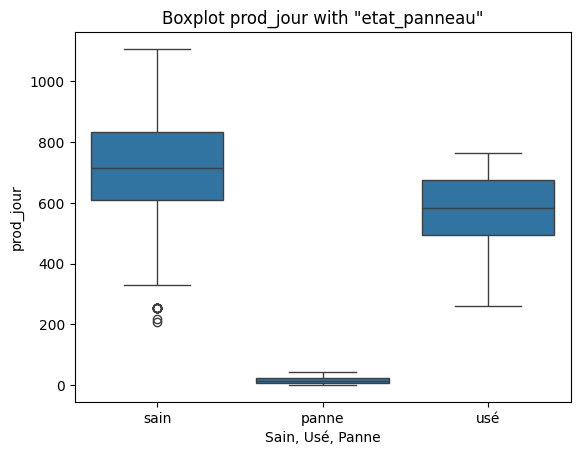

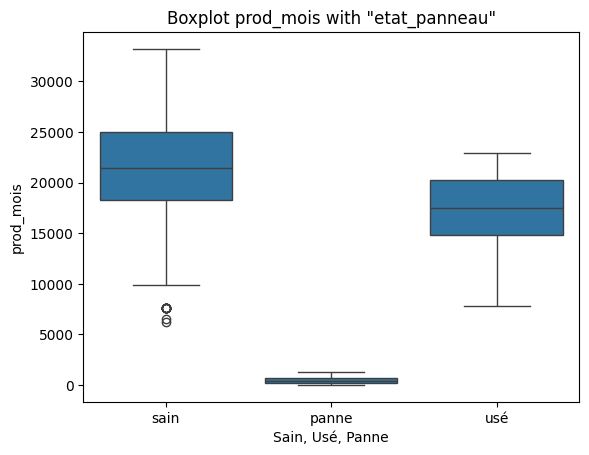

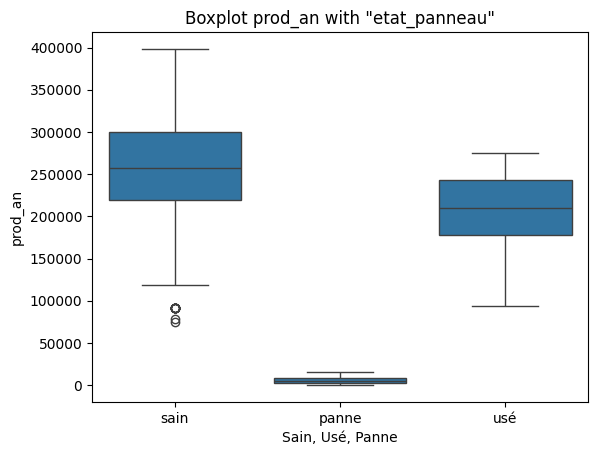

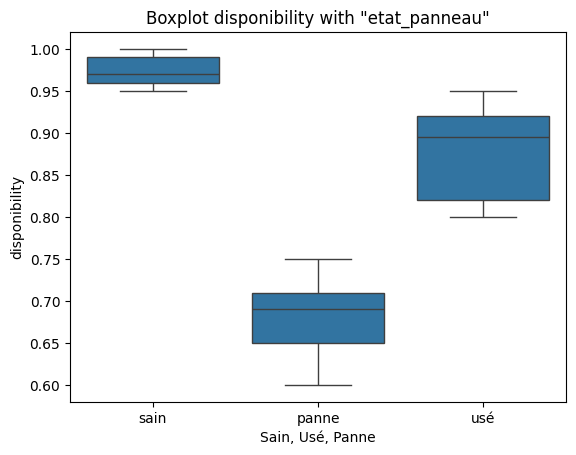

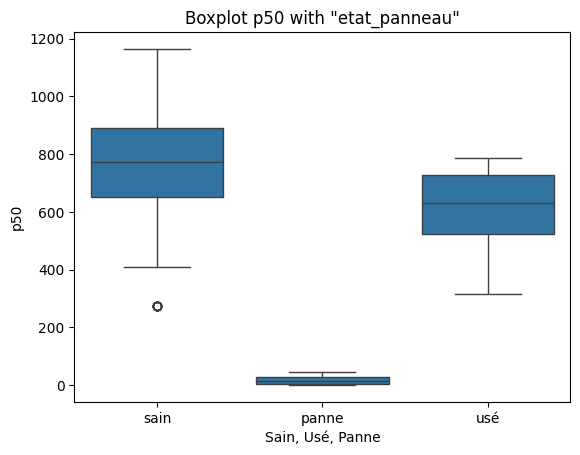

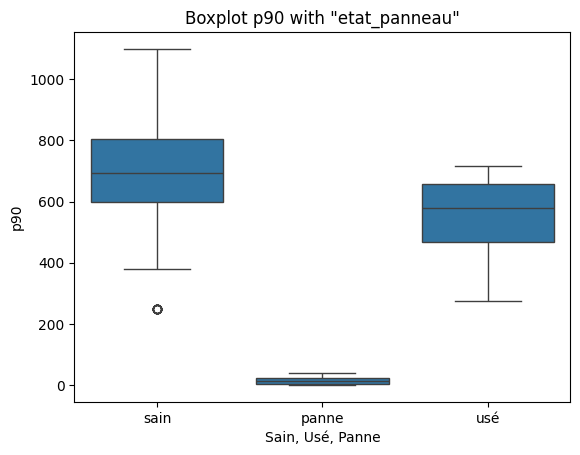

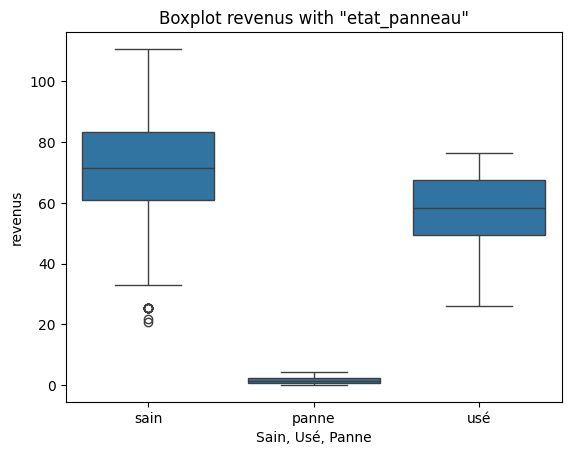

In [11]:
for col in columns:
    sns.boxplot(data=photovoltaic_datas, x="etat_panneau", y=col)
    plt.title(f"Boxplot {col} with \"etat_panneau\"")
    plt.xlabel("Sain, Usé, Panne")
    plt.ylabel(col)
    plt.show()

In [ ]:

p_values = []
test_columns = ["dc_power", "voltage", "current", "ac_power", "PR", "eff_module", "eff_global"]

for col in test_columns:
    # Ici le test de Kruskal Willis permets de définir a quels poinnts les différences observées peuvent etre du au hasard
    h, p_val = kruskal(photovoltaic_datas[col][photovoltaic_datas["etat_panneau"] == "sain"], photovoltaic_datas[col][photovoltaic_datas["etat_panneau"] == "panne"], photovoltaic_datas[col][photovoltaic_datas["etat_panneau"] == "usé"])
    p_values.append(p_val)

is_significant = []
for p_val in p_values:
    # Comme on test plusieurs p_values on applique la correction de Bonferronie:
    seuil = 0.05 / len(test_columns)
    if p_val < seuil:
        is_significant.append("Oui")
        print("Yes")
    else:
        is_significant.append("Non")
        print("No")

result = result_table = pd.DataFrame({'Variable': test_columns, 'P-value': p_values, 'Significative': is_significant})
result_table.set_index('Variable', inplace=True)
print(result_table)


0.0071428571428571435
Yes
0.0071428571428571435
Yes
0.0071428571428571435
Yes
0.0071428571428571435
Yes
0.0071428571428571435
Yes
0.0071428571428571435
No
0.0071428571428571435
Yes
                  P-value Significative
Variable                               
dc_power    1.600499e-273           Oui
voltage      1.671351e-14           Oui
current     5.490690e-282           Oui
ac_power    1.168442e-264           Oui
PR           0.000000e+00           Oui
eff_module   4.575253e-02           Non
eff_global   0.000000e+00           Oui


# Corrélation des variables numériques


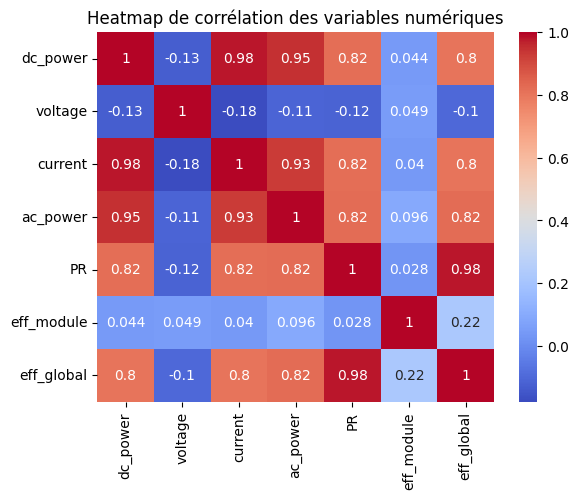

In [22]:
df_num = photovoltaic_datas[test_columns]

sns.heatmap(df_num.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap de corrélation des variables numériques')
plt.show()